In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import cohen_kappa_score

In [5]:
df = pd.read_excel("../data/GroupN_Annotations.xlsx")
df

,Name,Hair_JH,Hair_M,Hair_N,Hair_K,Hair_JS,Pen_JH,Pen_M,Pen_N,Pen_K,Pen_JS
0,PAT_1051_220_356.png,0,0,0,0,0,1,1,1,1,1
1,PAT_1066_281_698.png,1,1,1,1,1,1,1,1,1,1
2,PAT_108_161_423.png,2,2,1,1,2,0,0,0,0,0
3,PAT_1105_420_520.png,0,0,0,0,0,0,0,0,0,0
4,PAT_118_180_386.png,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
112,PAT_926_1758_714.png,2,2,2,2,2,0,0,0,0,0
113,PAT_942_1792_411.png,1,2,1,1,1,0,0,0,0,0
114,PAT_978_1844_599.png,0,0,0,0,0,0,0,0,0,0
115,PAT_994_1866_730.png,0,0,0,0,0,0,0,0,0,0


In [8]:
def observed_agreement(df, annotator1, annotator2):
    '''This function takes a dataframe, and two column names,
    and returns the observed agreement between all annotators'''
    return 100 *sum(df[annotator1] == df[annotator2])/df.shape[0] 
print(observed_agreement(df, 'Hair_JH', 'Hair_M'))
print(observed_agreement(df, 'Hair_JH', 'Hair_N'))
print(observed_agreement(df, 'Hair_JH', 'Hair_K'))
print(observed_agreement(df, 'Hair_JH', 'Hair_JS'))
print(observed_agreement(df, 'Hair_M', 'Hair_N'))
print(observed_agreement(df, 'Hair_M', 'Hair_JS'))
print(observed_agreement(df, 'Hair_M', 'Hair_K'))
print(observed_agreement(df, 'Hair_N', 'Hair_K'))
print(observed_agreement(df, 'Hair_N', 'Hair_JS'))


85.47008547008546
86.32478632478633
86.32478632478633
78.63247863247864
80.34188034188034
76.06837606837607
80.34188034188034
84.61538461538461
76.92307692307692


In [9]:
#Find how often each annotator thought the lesion had hair at level 1
hair = df[[x for x in df.columns if 'Hair' in x]].copy()
hair[hair==1].sum()

Hair_JH    40.0
Hair_M     28.0
Hair_N     34.0
Hair_K     46.0
Hair_JS    39.0
dtype: float64

In [13]:
print("_______Kappa score of hair_______")
print(round(cohen_kappa_score(df['Hair_JH'], df['Hair_M']), 2))
print(round(cohen_kappa_score(df['Hair_JH'], df['Hair_N']), 2))
print(round(cohen_kappa_score(df['Hair_JH'], df['Hair_JS']), 2))
print(round(cohen_kappa_score(df['Hair_JH'], df['Hair_K']), 2))
print(round(cohen_kappa_score(df['Hair_M'], df['Hair_N']), 2))
print(round(cohen_kappa_score(df['Hair_M'], df['Hair_K']), 2))
print(round(cohen_kappa_score(df['Hair_M'], df['Hair_JS']), 2))
print(round(cohen_kappa_score(df['Hair_N'], df['Hair_K']), 2))
print(round(cohen_kappa_score(df['Hair_N'], df['Hair_JS']), 2))
print("_______Kappa score of pen marks_______")
print(round(cohen_kappa_score(df['Pen_JH'], df['Pen_M']), 2))
print(round(cohen_kappa_score(df['Pen_JH'], df['Pen_JS']), 2))
print(round(cohen_kappa_score(df['Pen_JH'], df['Pen_N']), 2))
print(round(cohen_kappa_score(df['Pen_JH'], df['Pen_K']), 2))
print(round(cohen_kappa_score(df['Pen_M'], df['Pen_N']), 2))
print(round(cohen_kappa_score(df['Pen_M'], df['Pen_JS']), 2))
print(round(cohen_kappa_score(df['Pen_M'], df['Pen_K']), 2))
print(round(cohen_kappa_score(df['Pen_N'], df['Pen_K']), 2))
print(round(cohen_kappa_score(df['Pen_N'], df['Pen_JS']), 2))

_______Kappa score of hair_______
0.76
0.78
0.66
0.78
0.67
0.68
0.61
0.75
0.63
_______Kappa score of pen marks_______
0.8
0.86
0.88
0.91
0.77
0.8
0.81
0.88
0.83


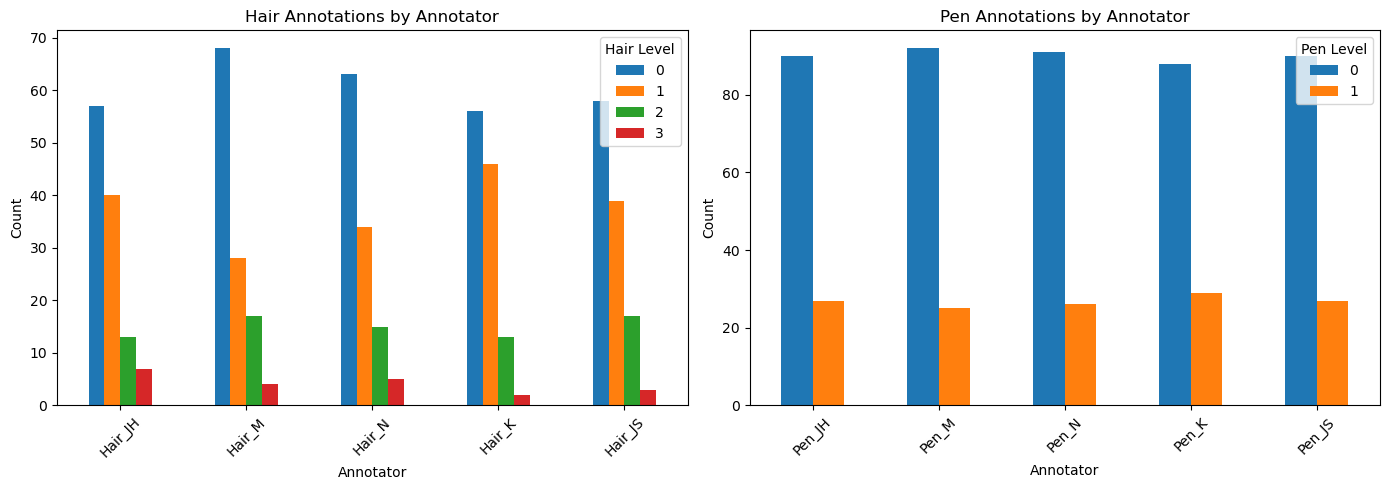

In [14]:
# Create subplots for Hair and Pen annotations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Hair annotations
hair_cols = [col for col in df.columns if 'Hair' in col]
hair_counts = df[hair_cols].apply(pd.Series.value_counts).fillna(0).astype(int)
hair_counts.T.plot(kind='bar', ax=axes[0])
axes[0].set_title('Hair Annotations by Annotator')
axes[0].set_xlabel('Annotator')
axes[0].set_ylabel('Count')
axes[0].legend(title='Hair Level')
axes[0].tick_params(axis='x', rotation=45)

# Plot Pen annotations
pen_cols = [col for col in df.columns if 'Pen' in col]
pen_counts = df[pen_cols].apply(pd.Series.value_counts).fillna(0).astype(int)
pen_counts.T.plot(kind='bar', ax=axes[1])
axes[1].set_title('Pen Annotations by Annotator')
axes[1].set_xlabel('Annotator')
axes[1].set_ylabel('Count')
axes[1].legend(title='Pen Level')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

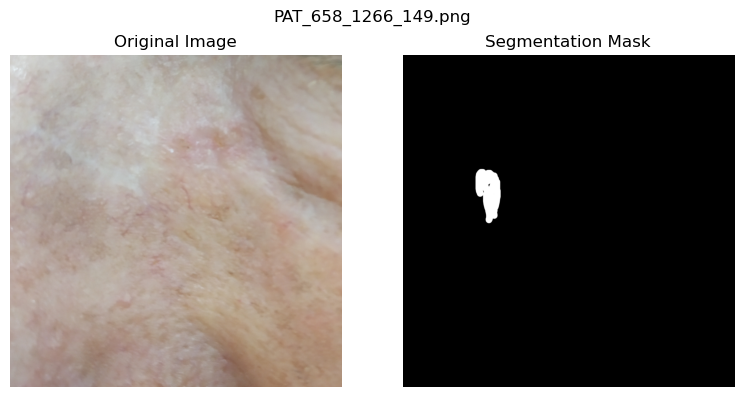

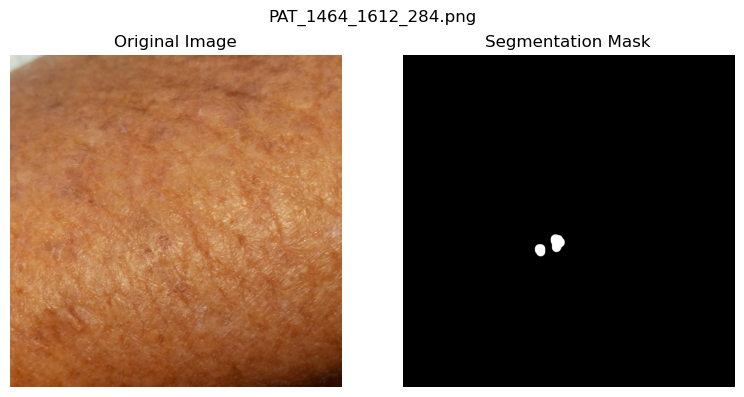

In [15]:
# Load specific images and their corresponding masks
img_path = "../data/imgs/"
mask_path = "../data/masks/"

image_ids = ["PAT_658_1266_149.png", "PAT_1464_1612_284.png"]

for image_id in image_ids:
    file_im = img_path + image_id
    file_mask = mask_path + image_id.replace(".png", "_mask.png")

    im = plt.imread(file_im)
    mask = plt.imread(file_mask)

    # Display image and mask side by side
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    axes[0].imshow(im)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(mask, cmap='gray')
    axes[1].set_title('Segmentation Mask')
    axes[1].axis('off')

    fig.suptitle(f'{image_id}')
    plt.tight_layout()
    plt.show()